# Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# fill twitter提供的開發Key and secret
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Create the access token and the access token secret
authenticate.set_access_token(access_token, access_token_secret)

# Create the API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [7]:
# Extract 100 tweets from the twitter user
tweets = api.user_timeline(screen_name = "elonmusk", count = 2000, lang = "en", tweet_mode = "extended")

all_tweets = [[tweet.user.screen_name, tweet.user.verified, tweet.full_text, tweet.created_at, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]

# Print the last 5 tweets from the account
print("Show the recent tweets : \n")
i = 1
for tweet in tweets[0:5]:
    print('(' + str(i) + ') ' + tweet.full_text + '\n')
    i += 1
    

Show the recent tweets : 

(1) @BillyM2k NFTs are jpeging the dollar

(2) @BillyM2k 🤣

(3) @ErcXspace Landing on tower arms

(4) @muratpak My car is currently orbiting Mars

(5) @muratpak You betcha



In [8]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame(all_tweets , columns=['Name','User Verified','Tweets', 'Posted Date', 'Retweet Counts', 'Favorites Counts'])

#Show the first 5 rows of data
df.tail()

,Name,User Verified,Tweets,Posted Date,Retweet Counts,Favorites Counts
195,elonmusk,True,@RationalEtienne @balajis If only he could fin...,2021-11-19 04:38:00,802,8204
196,elonmusk,True,@balajis Is he ever not grumpy!? https://t.co/...,2021-11-19 04:16:01,625,8794
197,elonmusk,True,@MichaelGalanin @physicsJ So fast and yet so slow,2021-11-19 04:08:26,982,33121
198,elonmusk,True,@WholeMarsBlog 🤣🤣,2021-11-19 03:01:23,255,6927
199,elonmusk,True,@EMTSLA @NASASpaceflight Yes,2021-11-18 22:25:00,201,2083


In [9]:
df.shape

(200, 6)

In [10]:
# Clean the text

# Create a function to clean the tweets
# substitute lowercase a to lowercase z and capital A to capital Z and any from 0 to 9
# the character 'r' that tells Python that the expression is a row string 
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mention
    text = re.sub(r'_[A-Za-z0-9]+', '' ,text) # Remove underline
    text = re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing Retweets(RT)
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link

    return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df


,Name,User Verified,Tweets,Posted Date,Retweet Counts,Favorites Counts
0,elonmusk,True,NFTs are jpeging the dollar,2021-12-05 03:35:29,2977,21253
1,elonmusk,True,🤣,2021-12-05 03:33:22,275,5339
2,elonmusk,True,Landing on tower arms,2021-12-04 20:12:16,263,7240
3,elonmusk,True,My car is currently orbiting Mars,2021-12-04 15:37:34,824,10803
4,elonmusk,True,You betcha,2021-12-04 15:36:37,173,4308
...,...,...,...,...,...,...
195,elonmusk,True,If only he could find those chaos emeralds …,2021-11-19 04:38:00,802,8204
196,elonmusk,True,Is he ever not grumpy!?,2021-11-19 04:16:01,625,8794
197,elonmusk,True,So fast and yet so slow,2021-11-19 04:08:26,982,33121
198,elonmusk,True,🤣🤣,2021-11-19 03:01:23,255,6927


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Name,User Verified,Tweets,Posted Date,Retweet Counts,Favorites Counts,Subjectivity,Polarity
0,elonmusk,True,Limiting factor for first launch is regulato...,2021-11-17 03:45:23,525,8787,0.569444,0.130556
1,elonmusk,True,"True, although it will look clean with close ...",2021-11-17 03:32:23,469,6905,0.620833,0.198611
2,elonmusk,True,12 million pounds of thrust at liftoff,2021-11-17 03:20:27,15174,224401,0.000000,0.000000
3,elonmusk,True,"Indeed. Over time, Tesla will generate hundr...",2021-11-16 21:24:40,1242,12801,0.000000,0.000000
4,elonmusk,True,Accurate thread,2021-11-16 20:47:30,400,6073,0.633333,0.400000
5,elonmusk,True,We are waiting for permit approval from Sa...,2021-11-16 02:11:13,590,21448,0.000000,0.000000
6,elonmusk,True,I like to dig my grave real deep 🤣🤣,2021-11-16 00:56:51,592,10479,0.600000,0.000000
7,elonmusk,True,Exactly,2021-11-16 00:44:50,170,4550,0.250000,0.250000
8,elonmusk,True,Burry is a broken clock,2021-11-15 22:13:05,2134,33733,0.400000,-0.400000
9,elonmusk,True,"The hard work by FAA, US Fish &amp; Wildlife ...",2021-11-15 20:01:47,426,7805,0.343750,0.085417


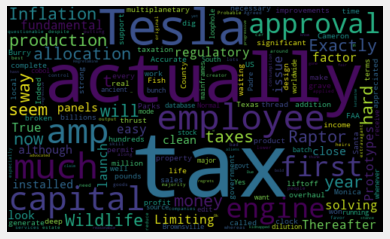

In [14]:
#Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 5, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [132]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
        
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Cybrrrtruck,0.000000,0.000000,Neutral
1,And all-time hodl champion,0.000000,0.000000,Neutral
2,OG Hipster,0.000000,0.000000,Neutral
3,Indeed,0.000000,0.000000,Neutral
4,Pohtaytohz,0.000000,0.000000,Neutral
...,...,...,...,...
95,Yes. It will be the highest output &amp; most...,0.550000,0.450000,Positive
96,The challenges of operating at Starbase left...,0.000000,0.000000,Neutral
97,Thanks Austin :),0.600000,0.350000,Positive
98,Roughly 800 to 1000 per year. That’s about w...,0.266667,-0.066667,Negative


In [133]:
# print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print('(' + str(j) +')' + sortedDF['Tweets'][i])
        print()
        j += 1

(1) Current Summon is sometimes useful, but mostly just a fun trick. Once we move summon (plus highway driving) to a single FSD stack, it will be sublime.

(2)  Cool!

(3)Fred Astaire is incredible. Worth watching his movies. One of a kind.

(4) Haha

(5) Nice

(6) A classic

(7) True

(8)  Haha

(9) Pure coincidence!

(10)   Very accurate!

(11)  Those are major factors

(12)         Absolutely!

(13)  In end, we kept production design almost exactly same as show car. Just some small tweaks here &amp; there to make it slightly better.

No door handles. Car recognizes you &amp; opens door.

Having all four wheels steer is amazing for nimble handling &amp; tight turns!

(14)   Version 3 of the SpaceX droneship. Team did great work! Will be epic to see the deep sea oil rigs converted to ocean spaceports for Starship.

(15) To be frank, there is always some chance that Cybertruck will flop, because it is so unlike anything else. 

I don’t care. I love it so much even if others don’t. 

Ot

In [134]:
# print all the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='True')
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print('(' + str(j) +')' + sortedDF['Tweets'][i])
        print()
        j += 1

(1) There’s a corner case where brick density is same density as water, reaching bottom due to momentum

(2) Roughly

(3)  Wide beta maybe with FSD rev 10, definitely with rev 11

(4)    Indeed, but again like a parking lot, a battery having big “roads” tends to decrease number of “parking spaces” (ie stores less energy)

(5)  FSD beta 9 is using the pure vision production code for highway driving. Beta 10 hopefully (Beta 11 definitely) will use one stack to rule them all – city streets, highway &amp; complex parking lots.

(6)  So maybe after that, Robbins Geller learned their lesson? Of course not. Once again, bearing false witness:



(7)  Robbins Gellar, the law firm suing Tesla &amp; me, was formed by the lawyers who managed to escape prison for bearing false witness, kickbacks &amp; bribes when they were at Milberg Weiss. 

They just moved across the street &amp; changed their name, but same people.



(8)  _ _   Similar to fiber optic. We are trying to ride the terrestrial fiber

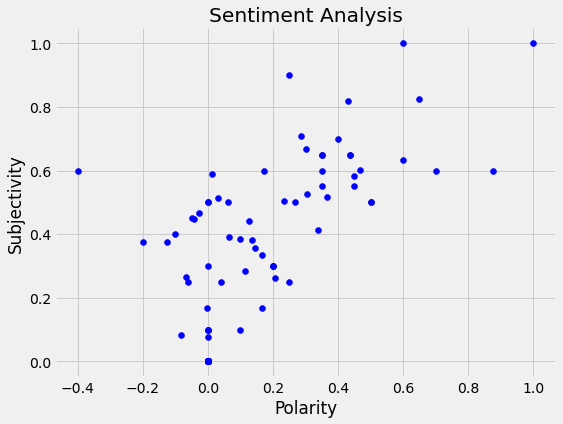

In [136]:
# plot subjective and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



In [146]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0])*100, 1)

46.0

In [147]:
# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0] *100), 1)


11.0

In [148]:
# Get the percentage of neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0] *100), 1)


43.0

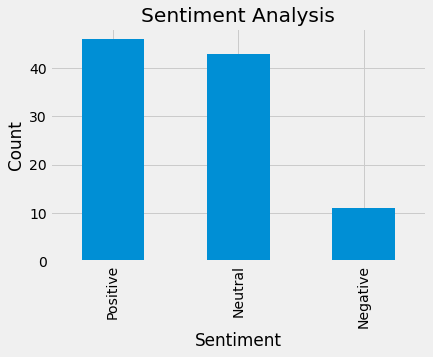

In [149]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visialize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
